In [ ]:
import itertools
import pickle
import numpy as np
np.set_printoptions(precision=3)

In [2]:
from IPython.display import clear_output
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid",{})
palette = sns.color_palette()

In [3]:
def state_distributions(log_name):
    MEM_FILE = './memories/' + log_name + '.mpk'

    # Load Memories
    with open(MEM_FILE, 'rb') as fpr:
        memories = np.array(list(pickle.load(fpr)))

    visited_states = np.stack(memories[:,0]).squeeze()
    actions = memories[:,1].astype(np.float32)
    rewards = memories[:,2].astype(np.float32)
    next_states = np.stack(memories[:,3]).squeeze()
    done = memories[:,4].astype(np.bool)

    consolidated_memory = np.column_stack((visited_states, actions, rewards, next_states, done))

    cart_pos = visited_states[:,0]
    cart_vel  = visited_states[:,1]
    pole_ang  = visited_states[:,2]
    pole_vel  = visited_states[:,3]
    
    # prepare canvas for plotting
    initial_index = 0 # starting data point
    block_size = 1000 # each plot shows data from block_size amount of data
    num_plots = 100
    subplot_span = 10 # number of subplot columns
    subplot_depth = 10 # number of subplot rows
    fig, axes = plt.subplots(subplot_depth,subplot_span,figsize=(20,20))

    # limits of state values
#     Num	Observation                 Min         Max
#         0	Cart Position             -4.8            4.8
#         1	Cart Velocity             -Inf            Inf
#         2	Pole Angle                 -24 deg        24 deg
#         3	Pole Velocity At Tip      -Inf            Inf

#     Episode Termination:
#     Pole Angle is more than 12 degrees
#     Cart Position is more than 2.4 (center of the cart reaches the edge of the display)
        
    cart_pos_max = 2.4
    cart_pos_min = -2.4
    
    pole_ang_max = 12 * 2 * np.pi / 360
    pole_ang_min = -12 * 2 * np.pi / 360
    
    ymax = 5 # max y-value
    
    # hide x_axis and y_axis
    for i, ax in enumerate(fig.axes):
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


    # iterate through all subplots axes of the figure and kdeplot
    for i in range(num_plots):
        row = i // subplot_span # floor division
        col = i % subplot_span # modulo division
        ax_cart_pos = axes[row, col]
        ax_cart_pos.set_ylim([0,ymax])

        ax_pole_ang = ax_cart_pos.twiny()
        ax_pole_ang.get_xaxis().set_visible(False)

        start = initial_index + i*block_size
        
        # plot kde plot
        cart_pos_density_plot = sns.kdeplot(cart_pos[start:start+block_size], ax=ax_cart_pos, color=palette[0], label='Cart Position', legend=False)
        cart_pos_density_plot.set_xlim(cart_pos_min, cart_pos_max)


        pole_ang_density_plot = sns.kdeplot(pole_ang[start:start+block_size], ax=ax_pole_ang, color=palette[1], label='Pole Angle', legend=False)
        pole_ang_density_plot.set_xlim(pole_ang_min, pole_ang_max)
        
        ax_cart_pos.set_title((str(i+1)+'K'),loc = 'left', pad = -20) # padding of -20 to print title within the figure
    
#     lines = [cart_pos_density_plot, pole_ang_density_plot]
#     labels = ['Cart Position', 'Pole Angle']
#     fig.legend((cart_pos_density_plot, pole_ang_density_plot), 
#                ('Cart Position', 'Pole Angle'),
#                'upper left' )


    cart_pos = mpatches.Patch(color=palette[0], label='Cart Position')
    pole_ang = mpatches.Patch(color=palette[1], label='Pole Angle')
    fig.legend(handles=[cart_pos,pole_ang], loc='upper right', bbox_to_anchor=(0.22, 0.75), ncol=2)

In [4]:
# # import os
# # os.listdir('./100K_run/')

# 'D1QN_D1QN_Naive_1000_freq_100_324267_04171400'
# 'D1QN-PER_D1QN_NaivePER_1000_freq_100_324267_04164957'

# 'DQN_DQN_Naive_1000_freq_100_324267_04171233'
# 'DQN-PER_DQN_NaivePER_1000_freq_100_324267_04164826'
# 'DQN-PER-original_DQN_NaivePER_100000_freq_1000_324267_04163756'

# 'D2QN_D2QN_Naive_1000_freq_100_324267_04170846'
# 'D2QN-PER_D2QN_NaivePER_1000_freq_100_324267_04165444'

# 'DuDQN_DuDQN_Naive_1000_freq_100_324267_04170649'
# 'DuDQN-PER_DuDQN_NaivePER_1000_freq_100_324267_04165300'

# 'DuD2QN_DuD2QN_Naive_1000_freq_100_324267_04170223'
# 'DuD2QN-PER_DuD2QN_NaivePER_1000_freq_100_324267_04165910'


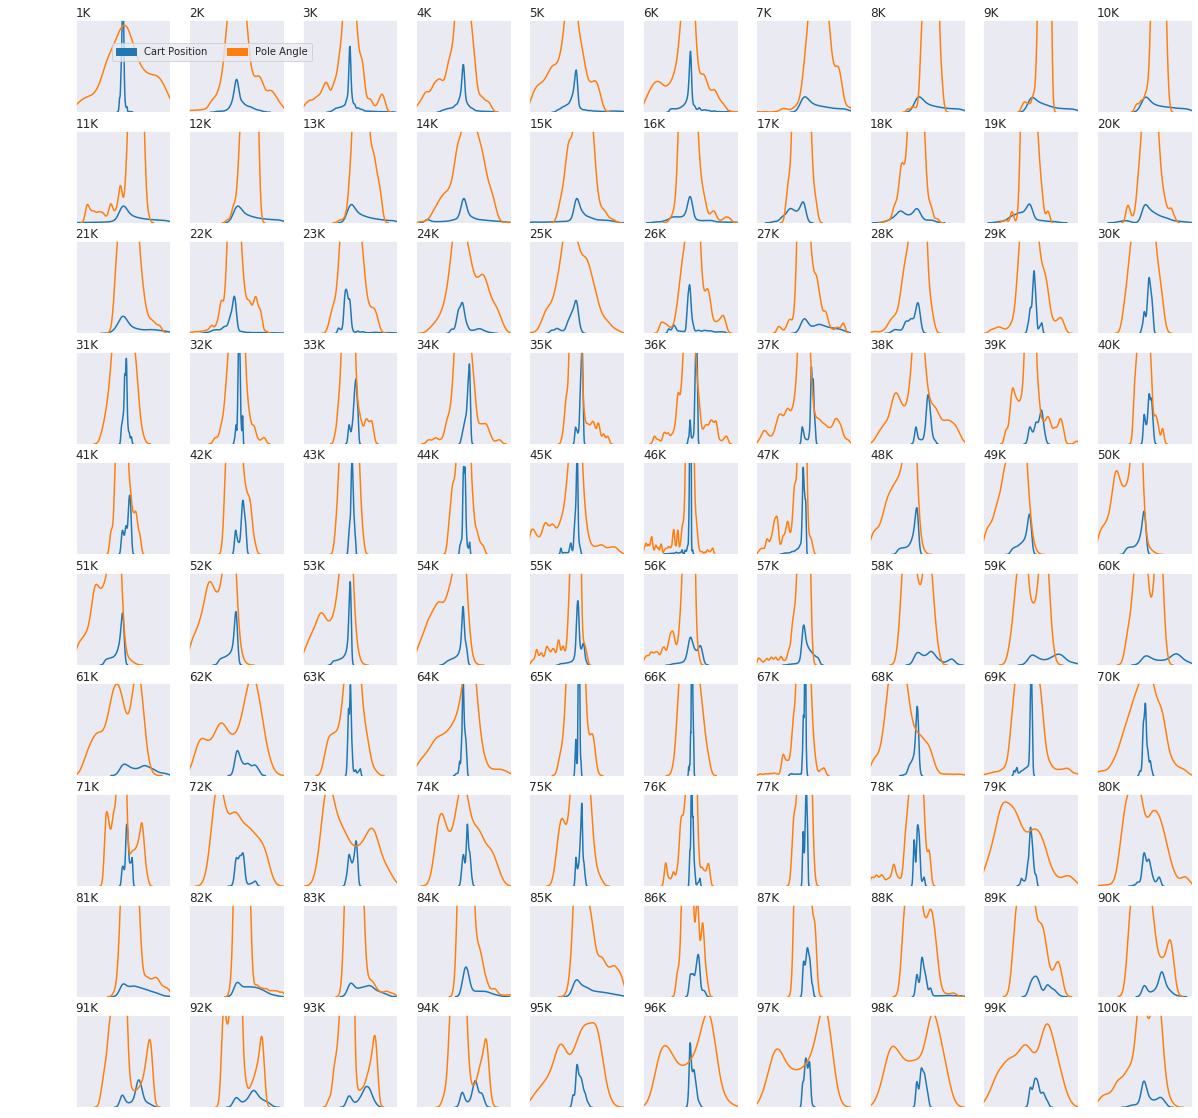

In [5]:
state_distributions('DQN_DQN_Naive_1000_freq_100_324267_04171233')